In [2]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sb
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd


In [2]:
data = pd.read_csv('final_train.csv')
data.keys()

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
       'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
       'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
       'Complementary', 'Online', 'Offline', 'Aviation',
       'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
       'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
       'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4',
       'lead_time_norm', 'price_norm'],
      dtype='object')

In [3]:
print(set(data['arrival_date']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}


In [26]:
print(set(data['no_of_weekend_nights']))
print(set(data['arrival_year']))

{0, 1, 2, 3, 4, 5, 6}
{2017, 2018}


In [42]:
pair = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}
print(len(data))
drop_list = []
for i in range(len(data)):
    year = data.loc[i, 'arrival_year']
    month = data.loc[i, 'arrival_month']
    day = data.loc[i, 'arrival_date']
    if pair[month] < day:
        print(i, " [ERROR] day is out of range for month")
        drop_list.append(i)
copy_data = pd.read_csv('final_train.csv')
print(len(copy_data)) 
for i in drop_list:
    data.drop([i], axis=0, inplace=True)
print(len(data))
    

25392
4077  [ERROR] day is out of range for month
4954  [ERROR] day is out of range for month
5034  [ERROR] day is out of range for month
5469  [ERROR] day is out of range for month
7844  [ERROR] day is out of range for month
8275  [ERROR] day is out of range for month
9209  [ERROR] day is out of range for month
9902  [ERROR] day is out of range for month
11427  [ERROR] day is out of range for month
11675  [ERROR] day is out of range for month
12893  [ERROR] day is out of range for month
13461  [ERROR] day is out of range for month
13697  [ERROR] day is out of range for month
15894  [ERROR] day is out of range for month
16164  [ERROR] day is out of range for month
16826  [ERROR] day is out of range for month
16888  [ERROR] day is out of range for month
17058  [ERROR] day is out of range for month
17090  [ERROR] day is out of range for month
19521  [ERROR] day is out of range for month
21140  [ERROR] day is out of range for month
21187  [ERROR] day is out of range for month
21211  [ERRO

In [44]:
data.to_csv('del_irr_date.csv', index = False)

In [51]:
from datetime import datetime, date

data = pd.read_csv('del_irr_date.csv')
def what_day_is_it(date):
    day = date.weekday()
    if (day == 0) or (day == 1) or (day == 2) or (day == 3) or (day == 4):
        data.loc[i, 'week'] = 1
        data.loc[i, 'weekend'] = 0
    else:
        data.loc[i, 'week'] = 0
        data.loc[i, 'weekend'] = 1
        

sample = pd.DataFrame()
for i in range(len(data)):
    year = data.loc[i, 'arrival_year']
    month = data.loc[i, 'arrival_month']
    day = data.loc[i, 'arrival_date']
    what_day_is_it(date(year, month, day))
print(data.keys())
print(data['weekend'].value_counts())
# 년월일 -> week 1, 0 / weekend 1, 0
data.to_csv('real_final_train.csv')

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
       'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
       'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
       'Complementary', 'Online', 'Offline', 'Aviation',
       'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
       'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
       'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4',
       'lead_time_norm', 'price_norm', 'week', 'weekend'],
      dtype='object')
0.0    17

In [ ]:
import seaborn as sns
sns.pairplot( data=del_outlier_df, vars=('no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'), plot_kws=dict(alpha=0.1), hue='booking_status' )

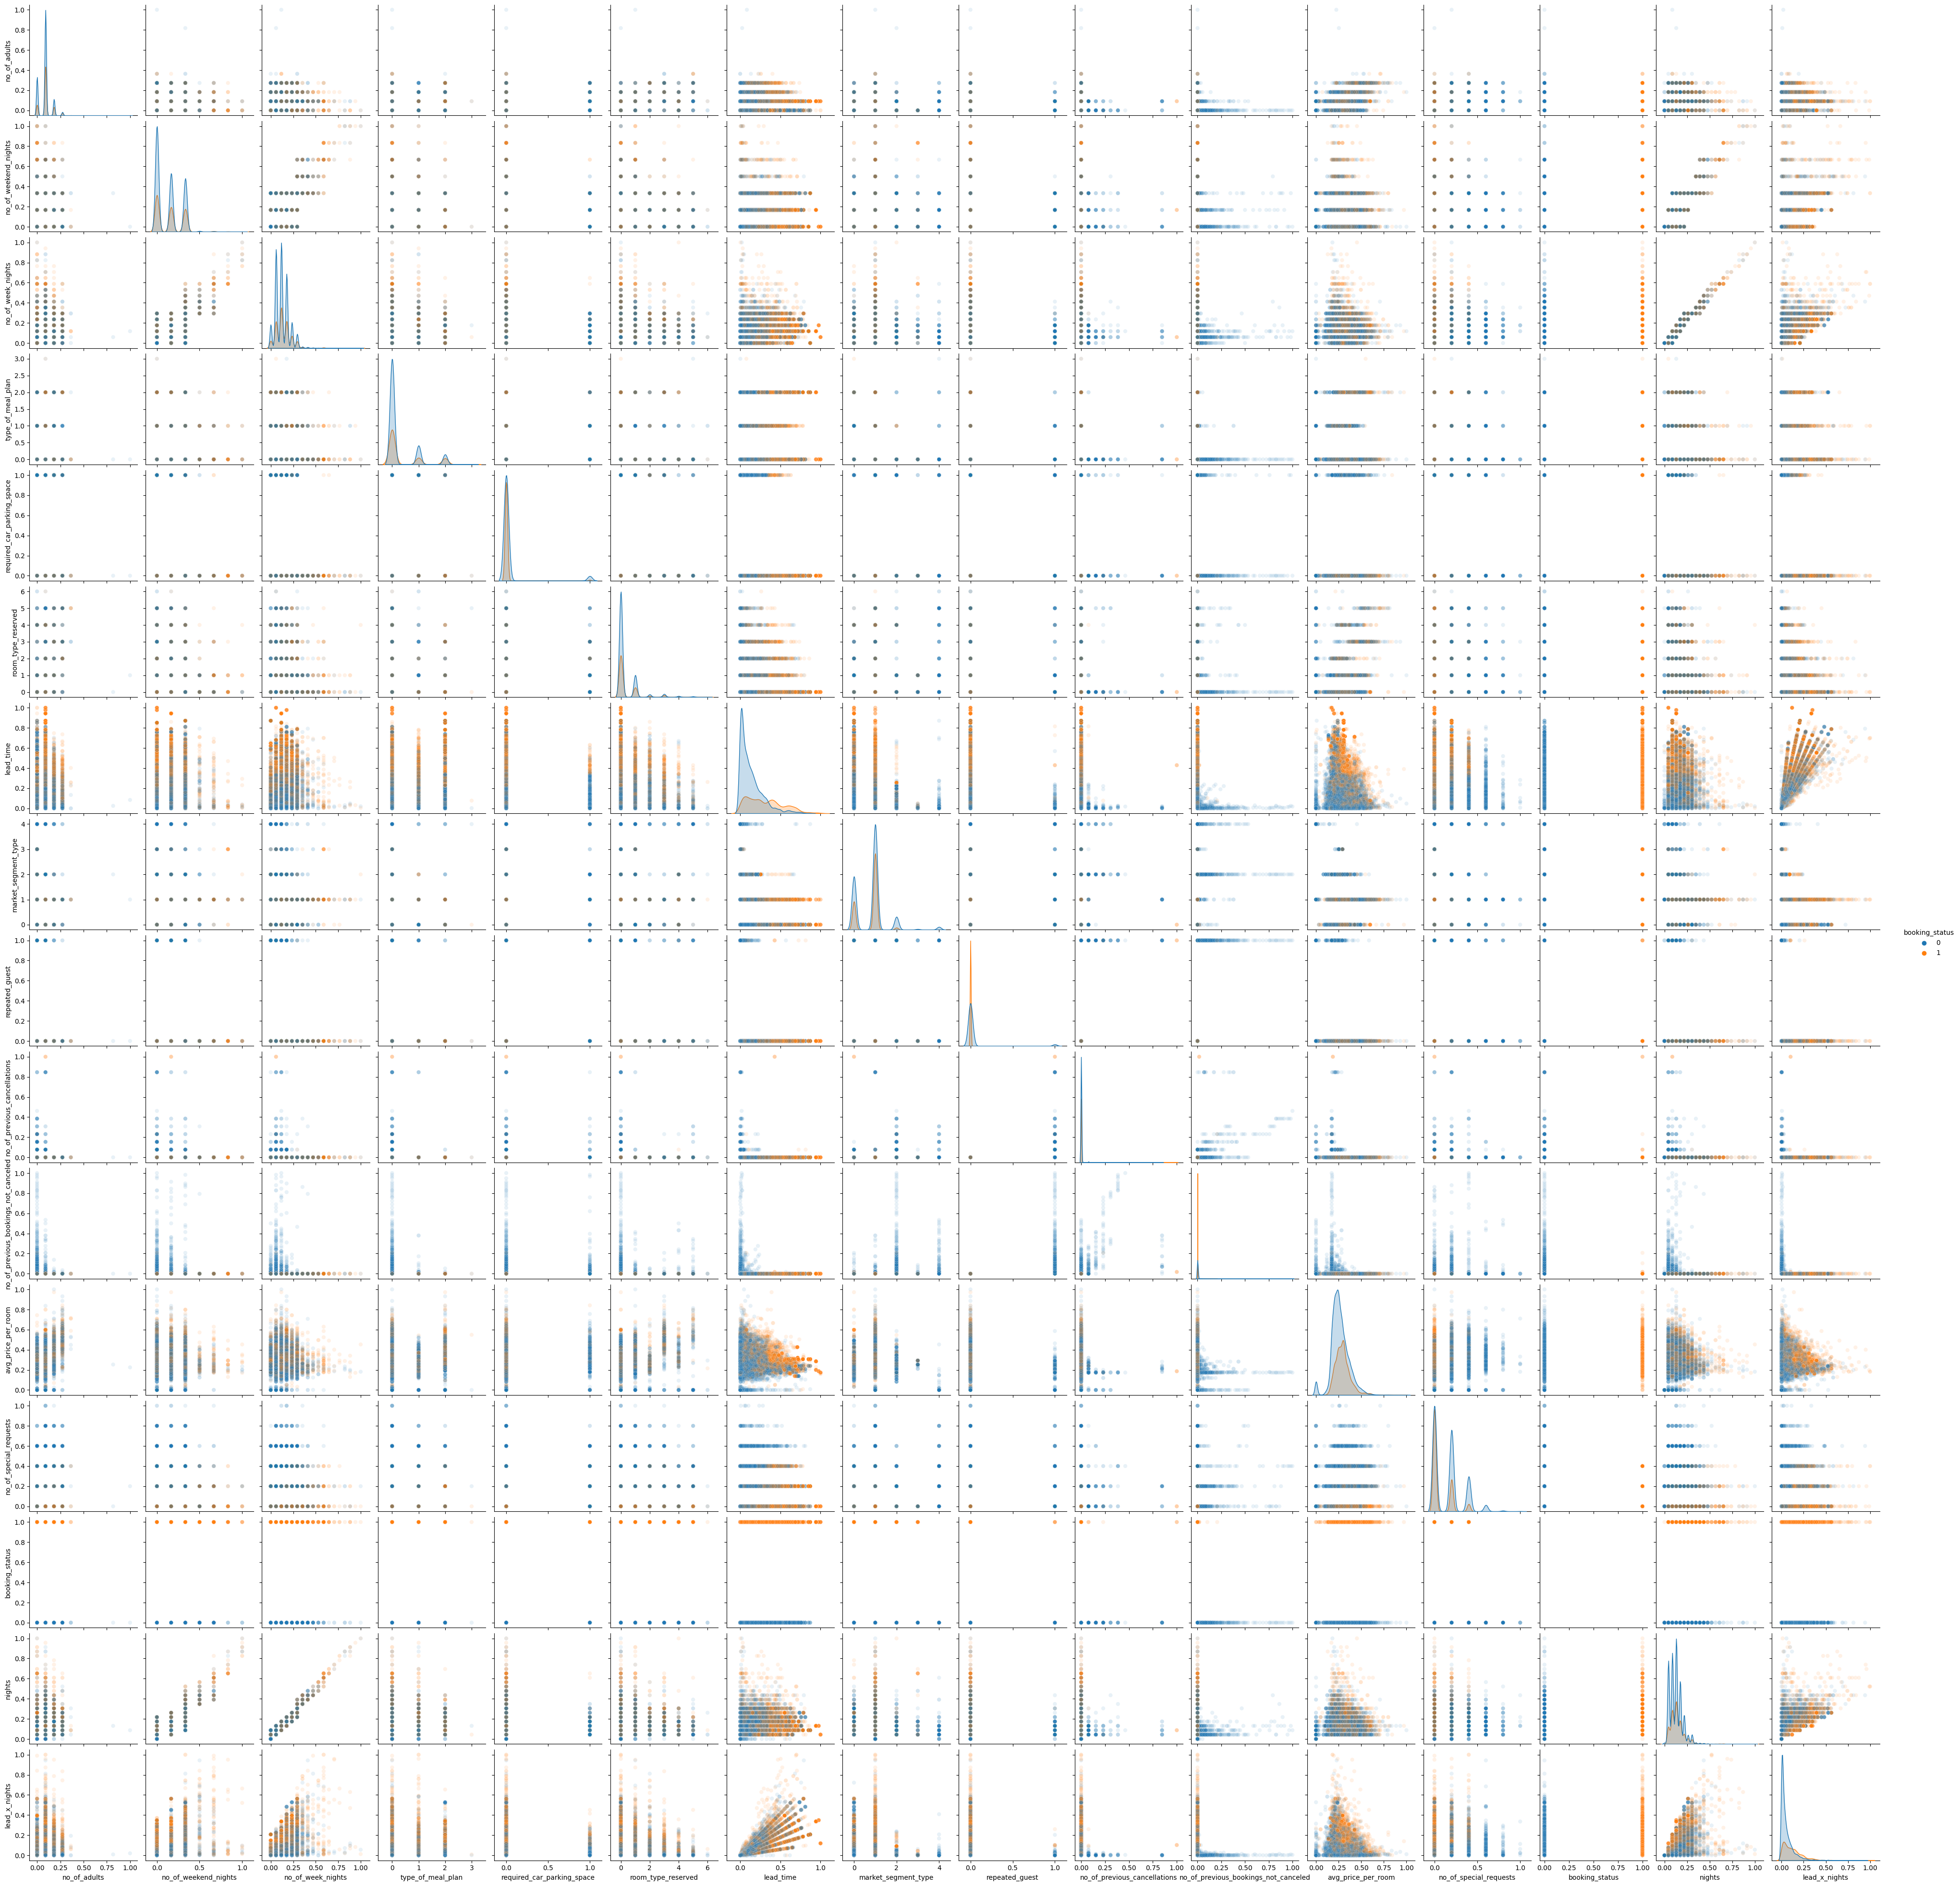

In [6]:
data = pd.read_csv('real_real_final_train.csv')
# sb.pairplot(data = data_sample, vars = ('week', 'weekend'), plot_kws=dict(alpha=0.1), hue='booking_status')

def draw_pairplot(data, feature, hue):
       data_sample = data[feature]
       sb.pairplot(data = data_sample, vars = feature, plot_kws=dict(alpha=0.1), hue=hue)
       
draw_pairplot(data, ['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights',
                 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
                 'lead_time', 'market_segment_type', 'repeated_guest',
                 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                 'avg_price_per_room', 'no_of_special_requests', 'booking_status',
                 'nights', 'lead_x_nights'], 'booking_status')
